# Figure 2 (MF-Phys)

original draft of code: SOZONE/windAnalyis/oceanFields/bargraph-streamlined-2.ipynb


In [81]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [82]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time


In [83]:
scendict = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'realistic ozone, SSP 1-2.6',
        'color':'#E8D215',
        'runid':'TOM12_TJ_1AA1'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'realistic ozone, SSP 3-7.0',
        'color':'#87800A',
        'runid':'TOM12_TJ_1BA1'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'fixed ozone, SSP 1-2.6',
        'color':'#2DC18E',
        'runid':'TOM12_TJ_2AA1'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'fixed ozone, SSP 3-7.0',
        'color':'#18765C',
        'runid':'TOM12_TJ_2BA1'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'1990 ozone, SSP 1-2.6',
        'color':'#FF462B',
        'runid':'TOM12_TJ_3AA1'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'1990 ozone, SSP 3-7.0',
        'color':'#822722',
        'runid':'TOM12_TJ_3BA1'},
    'PI': {
        'hist_str': '',
        'fut_str': '',
        'name': 'PI OZONE \n PI TEMP.',
        'name2':'PI: OzonePI-PI',
        'color':'silver',
        'runid':'TOM12_TJ_PIA1'}
}

###  extract overturning fields into one dataset

In [84]:
def make_yearlist(yrst, yrend, tscen, \
                  tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/max_OT_s50/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'{tdir}/seas_OT_{yr}_{tscen}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

ex = False

if ex:

    ot_ukesm_1A = xr.open_mfdataset(make_yearlist(1950,2099,'1A'))
    ot_ukesm_2A = xr.open_mfdataset(make_yearlist(1950,2099,'2A'))
    ot_ukesm_3A = xr.open_mfdataset(make_yearlist(1950,2099,'3A'))
    ot_ukesm_1B = xr.open_mfdataset(make_yearlist(1950,2099,'1B'))
    ot_ukesm_2B = xr.open_mfdataset(make_yearlist(1950,2099,'2B'))
    ot_ukesm_3B = xr.open_mfdataset(make_yearlist(1950,2099,'3B'))
    
    ot_ukesm_1A.to_netcdf('/gpfs/home/mep22dku/scratch/SO-wind-feedback/data/fig2/ot_ukesm_1A.nc')
    ot_ukesm_1B.to_netcdf('/gpfs/home/mep22dku/scratch/SO-wind-feedback/data/fig2/ot_ukesm_1B.nc')
    ot_ukesm_2A.to_netcdf('/gpfs/home/mep22dku/scratch/SO-wind-feedback/data/fig2/ot_ukesm_2A.nc')
    ot_ukesm_2B.to_netcdf('/gpfs/home/mep22dku/scratch/SO-wind-feedback/data/fig2/ot_ukesm_2B.nc')
    ot_ukesm_3A.to_netcdf('/gpfs/home/mep22dku/scratch/SO-wind-feedback/data/fig2/ot_ukesm_3A.nc')
    ot_ukesm_3B.to_netcdf('/gpfs/home/mep22dku/scratch/SO-wind-feedback/data/fig2/ot_ukesm_3B.nc')

# LOAD PLOTTED DATA

In [85]:
baseDir = '/gpfs/home/mep22dku/scratch/SO-wind-feedback/data/fig2/'

mld_ukesm_1A = xr.open_dataset(f'{baseDir}//somxl010_ukesm_1A.nc')
mld_ukesm_1B = xr.open_dataset(f'{baseDir}//somxl010_ukesm_1B.nc')
mld_ukesm_2A = xr.open_dataset(f'{baseDir}//somxl010_ukesm_2A.nc')
mld_ukesm_2B = xr.open_dataset(f'{baseDir}//somxl010_ukesm_2B.nc')
mld_ukesm_3A = xr.open_dataset(f'{baseDir}//somxl010_ukesm_3A.nc')
mld_ukesm_3B = xr.open_dataset(f'{baseDir}//somxl010_ukesm_3B.nc')


sst_ukesm_1A = xr.open_dataset(f'{baseDir}//SST_ukesm_1A.nc')
sst_ukesm_1B = xr.open_dataset(f'{baseDir}//SST_ukesm_1B.nc')
sst_ukesm_2A = xr.open_dataset(f'{baseDir}//SST_ukesm_2A.nc')
sst_ukesm_2B = xr.open_dataset(f'{baseDir}//SST_ukesm_2B.nc')
sst_ukesm_3A = xr.open_dataset(f'{baseDir}//SST_ukesm_3A.nc')
sst_ukesm_3B = xr.open_dataset(f'{baseDir}//SST_ukesm_3B.nc')

Cflx_ukesm_1A = xr.open_dataset(f'{baseDir}//CflxTS_ukesm_1A_SO.nc')
Cflx_ukesm_1B = xr.open_dataset(f'{baseDir}//CflxTS_ukesm_1B_SO.nc')
Cflx_ukesm_2A = xr.open_dataset(f'{baseDir}//CflxTS_ukesm_2A_SO.nc')
Cflx_ukesm_2B = xr.open_dataset(f'{baseDir}//CflxTS_ukesm_2B_SO.nc')
Cflx_ukesm_3A = xr.open_dataset(f'{baseDir}//CflxTS_ukesm_3A_SO.nc')
Cflx_ukesm_3B = xr.open_dataset(f'{baseDir}//CflxTS_ukesm_3B_SO.nc')
    
ot_ukesm_1A = xr.open_dataset('./data/fig2/ot_ukesm_1A.nc')
ot_ukesm_1B = xr.open_dataset('./data/fig2/ot_ukesm_1B.nc')
ot_ukesm_2A = xr.open_dataset('./data/fig2/ot_ukesm_2A.nc')
ot_ukesm_2B = xr.open_dataset('./data/fig2/ot_ukesm_2B.nc')
ot_ukesm_3A = xr.open_dataset('./data/fig2/ot_ukesm_3A.nc')
ot_ukesm_3B = xr.open_dataset('./data/fig2/ot_ukesm_3B.nc')

In [86]:
def get_effect_ozone(sc1,sc2,dec1=1950, dec2=2090,var = 'wspd10m', seas = 'FY'):

    ##for warming just have 
    sc = sc1 - sc2
    
    if seas == 'FY':
        
        start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01')).\
        groupby('time_counter.year').mean().mean().values
        end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01')).\
        groupby('time_counter.year').mean().mean().values
        
    else:
        
        start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01'))
        start = start.sel(time_counter=(start['time_counter.season'] == seas)).\
        groupby('time_counter.year').mean().mean().values
        
        end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01'))
        end = end.sel(time_counter=(end['time_counter.season'] == seas)).\
        groupby('time_counter.year').mean().mean().values
    
    effect1 = end-start # the better one i think 
    effect2 = end
    
    return effect1, effect2

def get_effect_warming(sc1,dec1=1950, dec2=2090,var = 'wspd10m', seas = 'FY'):

    ##for warming just have 
    sc = sc1
    
    if seas == 'FY':
        
        start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01')).\
        groupby('time_counter.year').mean().mean().values
        end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01')).\
        groupby('time_counter.year').mean().mean().values

    else:
        
        start = sc[var].sel(time_counter=slice(f'{dec1}-01-01', f'{dec1+10}-01-01'))
        start = start.sel(time_counter=(start['time_counter.season'] == seas)).\
        groupby('time_counter.year').mean().mean().values
        
        end = sc[var].sel(time_counter=slice(f'{dec2}-01-01', f'{dec2+10}-01-01'))
        end = end.sel(time_counter=(end['time_counter.season'] == seas)).\
        groupby('time_counter.year').mean().mean().values
    
    effect1 = end-start # the better one i think 
    effect2 = end
    
    return effect1, effect2

In [87]:
def plot_thing_fyonly(wspdset,scens, var, ind = 0, var1 = 'tos',\
                      lw = [2, 2, 1.2, 1.2, 1.2, 1.2],\
                      alpha = [1, 1, 0.7, 0.7, 0.7, 0.7]):
    for x in range(0,6):
        tsc = scens[x]
        wspd = wspdset[x]

        tv = wspd[var1].groupby('time_counter.year').mean()
        tv = tv.chunk(10)
        tv_rol = tv.rolling(year=10, center=True).mean()
        tv_rol.plot(ax = axs[0+ind], color = scendict[tsc]['color'], \
                    linewidth = lw[x], linestyle = '-', alpha = alpha[x], label = scendict[tsc]['name2'])
        


# * MAIN FIGURE * noto version of figure for revised paper

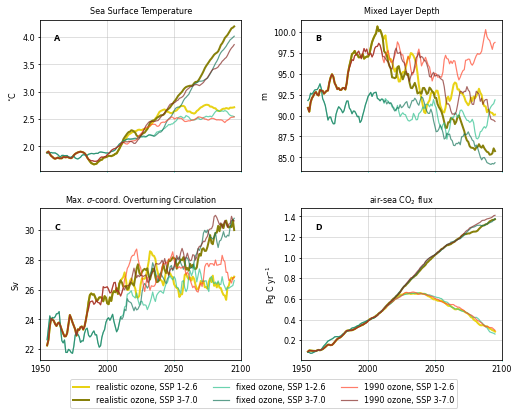

In [88]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Specify the paths to the Noto Sans font files
noto_sans_regular = "/gpfs/home/mep22dku/scratch/Noto_Sans/static/NotoSans-Regular.ttf"
noto_sans_bold = "/gpfs/home/mep22dku/scratch/Noto_Sans/static/NotoSans-Bold.ttf"

# Create FontProperties objects for Noto Sans
noto_font_regular = font_manager.FontProperties(fname=noto_sans_regular)
noto_font_bold = font_manager.FontProperties(fname=noto_sans_bold)

# Disable LaTeX rendering
plt.rcParams['text.usetex'] = False

# Update rcParams to use the Noto Sans font globally
plt.rcParams.update({
    'font.size': 8,
    'font.family': noto_font_regular.get_name(),  # Set the font family globally
})

fs = 8

fig, axs = plt.subplots(2,2, figsize=(7.25, 5.34), facecolor='w', edgecolor='k')
axs = axs.ravel()


scens_o3 = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
scens_o3 = ['ozone depl.-fixed ozone \n (SSP 3-7.0)', 'ozone depl.-fixed ozone \n (SSP 1-2.6)',\
            'ozone rec .-fixed ozone \n (SSP 3-7.0)', 'ozone rec .-fixed ozone \n (SSP 1-2.6)']

cols_o3 = ['#822722', '#FF462B', '#87800A', '#E8D215']
cols_t = ['dimgrey', 'silver']
scens_t = ['fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 3-7.0)',\
           'fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 1-2.6)']

############## lines

wspdset_sst = [sst_ukesm_1A, sst_ukesm_1B, sst_ukesm_2A, sst_ukesm_2B, sst_ukesm_3A, sst_ukesm_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']
lwset = [2.0, 2.0, 1.2, 1.2, 1.2, 1.2]
alphaset = [2.0, 2.0, 1.2, 1.2, 1.2, 1.2]

plot_thing_fyonly(wspdset_sst,scens, 'tos',ind = 0, var1 = 'tos')

wspdset_mld = [mld_ukesm_1A, mld_ukesm_1B, mld_ukesm_2A, mld_ukesm_2B, mld_ukesm_3A, mld_ukesm_3B]
plot_thing_fyonly(wspdset_mld,scens, 'somxl010',ind = 1, var1 = 'somxl010')

wspdset_ot = [ot_ukesm_1A, ot_ukesm_1B, ot_ukesm_2A, ot_ukesm_2B, ot_ukesm_3A, ot_ukesm_3B]
plot_thing_fyonly(wspdset_ot,scens, 'max_OT',ind = 2, var1 = 'max_OT_yr')

wspdset_Cflx = [Cflx_ukesm_1A, Cflx_ukesm_1B, Cflx_ukesm_2A, Cflx_ukesm_2B, Cflx_ukesm_3A, Cflx_ukesm_3B]
plot_thing_fyonly(wspdset_Cflx,scens, 'Cflx',ind = 3, var1 = 'Cflx')


axs[0].set_xlabel('')
axs[0].set_ylabel('$^{\circ}$C')
axs[0].set_title('Sea Surface Temperature', fontsize =fs)
axs[1].set_xlabel('')
axs[1].set_ylabel('m')
axs[1].set_title('Mixed Layer Depth', fontsize =fs)
axs[2].set_ylabel('Sv')
axs[2].set_title('Max. $\sigma$-coord. Overturning Circulation', fontsize =fs)
axs[3].set_ylabel('Pg C yr$^{-1}$', fontsize =fs)
axs[3].set_title('air-sea CO$_2$ flux', fontsize =fs)

plt.subplots_adjust(hspace = 0.24 )

labs = ['A', 'B', 'C', 'D']
for i in range(0,4):
    axs[i].set_xlim([1950,2100])
    axs[i].set_xticks(np.arange(1950,2150,50))
    axs[i].set_xlabel('')
    axs[i].grid(alpha = 0.5)
    axs[i].tick_params(axis="x", direction="out", length=1, width=1, color="turquoise")
    

    axs[i].text(0.10, 0.91, labs[i], transform=axs[i].transAxes, ha='right', va='top',\
                fontproperties = noto_font_bold, fontsize = fs+1)

for i in range(0,4):
    axs[i].tick_params(axis='y', length=2)
    
plt.tight_layout()
    
axs[2].legend(bbox_to_anchor = [2.1,-0.1], ncol = 3)
axs[0].set_xticklabels('')
axs[1].set_xticklabels('')


fname = './figs/RMF-2.jpg'
fig.savefig(fname, transparent=None, dpi=300, format=None,
        metadata=None, bbox_inches='tight', pad_inches=0.02,
        facecolor='auto', edgecolor='auto', backend=None,\
       )

plt.show()


In [89]:
from PIL import Image
import os

def convert_jpg_to_pdf(jpg_path, pdf_path=None, dpi=(300, 300)):
    """
    Convert a JPG image to a high-quality PDF
    
    Parameters:
    jpg_path: str, path to input JPG file
    pdf_path: str, path for output PDF file (optional)
    dpi: tuple, resolution for the output (default 300 DPI)
    """
    # If no PDF path specified, use the same name as JPG but with .pdf extension
    if pdf_path is None:
        pdf_path = os.path.splitext(jpg_path)[0] + '.pdf'
    
    # Open the image and convert to RGB mode (removes any alpha channel)
    with Image.open(jpg_path) as image:
        # Convert to RGB if not already
        if image.mode != 'RGB':
            image = image.convert('RGB')
            
        # Set the DPI information
        image.info['dpi'] = dpi
        
        # Save as PDF with high quality
        image.save(
            pdf_path,
            'PDF',
            resolution=dpi[0],
            save_all=True,
            quality=100
        )
    
    return pdf_path


convert_jpg_to_pdf('./figs/RMF-2.jpg', './figs/RMF-2-hq.pdf')



'./figs/RMF-2-hq.pdf'

# SF - by season figure of SST, MLD, OT, and CO2

In [90]:
def plot_thing(wspdset,scens, var, ind = 0, var1 = 'tos'):
    for x in range(0,6):
        tsc = scens[x]
        wspd = wspdset[x]

        tv = wspd[var1].groupby('time_counter.year').mean()
        tv = tv.chunk(10)
        tv_rol = tv.rolling(year=10, center=True).mean()
        #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
        tv_rol.plot(ax = axs[0+ind], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name2'])

        tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
        tv = tv.chunk(10)
        tv_rol = tv.rolling(year=10, center=True).mean()
        #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
        tv_rol.plot(ax = axs[1+ind], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name2'])

        tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
        tv = tv.chunk(10)
        tv_rol = tv.rolling(year=10, center=True).mean()
        #tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
        tv_rol.plot(ax = axs[2+ind], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name'])

        tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
        tv = tv.chunk(10)
        tv_rol = tv.rolling(year=10, center=True).mean()
        #tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
        tv_rol.plot(ax = axs[3+ind], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1, label = scendict[tsc]['name'])

        tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
        tv = tv.chunk(10)
        tv_rol = tv.rolling(year=10, center=True).mean()
        #tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
        tv_rol.plot(ax = axs[4+ind], color = scendict[tsc]['color'], linewidth = 2, linestyle = '-', alpha = 1)

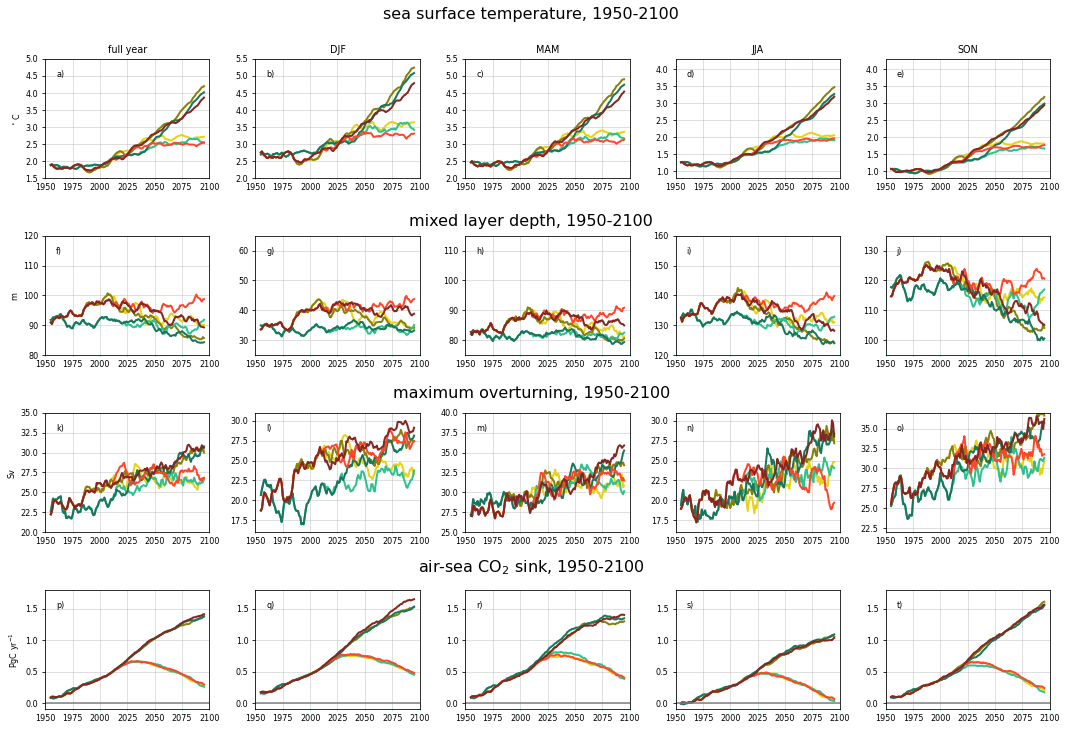

In [91]:
fact = 1
fig, axs = plt.subplots(4,5, figsize=(18*fact, 9*1.33*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

scens_o3 = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
scens_o3 = ['ozone depl.-fixed ozone \n (SSP 3-7.0)', 'ozone depl.-fixed ozone \n (SSP 1-2.6)',\
            'ozone rec .-fixed ozone \n (SSP 3-7.0)', 'ozone rec .-fixed ozone \n (SSP 1-2.6)']

cols_o3 = ['#822722', '#FF462B', '#87800A', '#E8D215']
cols_t = ['dimgrey', 'silver']
scens_t = ['fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 3-7.0)',\
           'fixed ozone - fixed ozone$_\overline{1950-1960}$ \n (SSP 1-2.6)']


############## lines
tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i])

wspdset_sst = [sst_ukesm_1A, sst_ukesm_1B, sst_ukesm_2A, sst_ukesm_2B, sst_ukesm_3A, sst_ukesm_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']
plot_thing(wspdset_sst,scens, 'tos',ind = 0, var1 = 'tos')

wspdset_mld = [mld_ukesm_1A, mld_ukesm_1B, mld_ukesm_2A, mld_ukesm_2B, mld_ukesm_3A, mld_ukesm_3B]
plot_thing(wspdset_mld,scens, 'somxl010',ind = 5, var1 = 'somxl010')

wspdset_ot = [ot_ukesm_1A, ot_ukesm_1B, ot_ukesm_2A, ot_ukesm_2B, ot_ukesm_3A, ot_ukesm_3B]
#scens = ['1A', '1B', '2A', '2B', '3A', '3B']
plot_thing(wspdset_ot,scens, 'max_OT',ind = 10, var1 = 'max_OT_yr')

wspdset_cflx = [Cflx_ukesm_1A, Cflx_ukesm_1B, Cflx_ukesm_2A, Cflx_ukesm_2B, Cflx_ukesm_3A, Cflx_ukesm_3B]
plot_thing(wspdset_cflx,scens, 'Cflx',ind = 15, var1 = 'Cflx')

##################
### titles, etc
plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
t1 = 'wind speed, 1950-2100'
t2 = 'effect of ODS concentration changes on wind speed, 1950-2100'
t3 = 'effect of GHG emissions on wind speed, 1950-2100'
t4 = 'effect of ODS concentration changes and GHG emissions on wind speed, $\overline{2090-2100} - \overline{1950-1960}$'

fs = 16

for i in range(0,20):
    axs[i].tick_params(axis="x", direction="out", length=1, width=1, color="turquoise")
    axs[i].grid(alpha = 0.5)
    
for i in range(0,20):
    axs[i].set_xlim([1950,2100])
    axs[i].set_xlabel('')
    
for i in range(1,20):
    axs[i].set_xlim([1950,2100])
    axs[i].set_ylabel('')
    
for i in range(0,20):
    #axs[i].set_xlim([1950,2100])
    #axs[i].set_ylabel('')
    axs[i].axhline(y=0, color = 'grey')
    
lab = ['a)','b)','c)','d)','e)',] 
ymi = np.array([1.5,2,2,0.8,0.8])  
hi = 3.5
for i in range(0,5):
    axs[i].set_ylim([ymi[i],ymi[i]+hi])
    axs[i].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['f)','g)','h)','i)','j)']  
ymi = np.array([80,25,75,120,95])  
hi = 40
for i in range(0,5):
    axs[i+5].set_ylim([ymi[i],ymi[i]+hi])
    axs[i+5].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['k)','l)','m)','n)','o)']  
ymi = np.array([20,16,25,16,22])  
hi = 15
for i in range(0,5):
    axs[i+10].set_ylim([ymi[i],ymi[i]+hi])
    axs[i+10].text(1960,ymi[i]+0.85*hi,lab[i])
    
lab = ['p)','q)','r)','s)','t)']  
ymi = np.array([-0.1,-0.1,-0.1,-0.1,-0.1])
hi = 1.9
for i in range(0,5):
    axs[i+15].set_ylim([ymi[i],ymi[i]+hi])
    axs[i+15].text(1960,ymi[i]+0.85*hi,lab[i])

tits = ['full year','DJF','MAM','JJA','SON',]
for i in range(0,5):
    axs[i].set_title(tits[i])
    

plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
t1 = 'sea surface temperature, 1950-2100'
t2 = 'mixed layer depth, 1950-2100'
t3 = 'maximum overturning, 1950-2100'
t4 = 'air-sea CO$_2$ sink, 1950-2100'

axs[0].set_ylabel('$^{\circ}$ C')
axs[5].set_ylabel('m')
axs[10].set_ylabel('Sv')
axs[15].set_ylabel('PgC yr$^{-1}$')

fs = 16
plt.subplots_adjust(hspace = 0.48 )
plt.subplots_adjust(wspace = 0.28 )
os = 0.02
plt.figtext(0.5,0.94, t1, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.70, t2, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.50, t3, ha="center", va="top", fontsize=fs, color="k")
plt.figtext(0.5,0.3, t4, ha="center", va="top", fontsize=fs, color="k")

plt.savefig('./figs/MF-Phys-seas.jpg')
